In [1]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# import plotly.express as px
# import plotly.graph_objects as go

from utils.plotting import plot_interactive_lines

In [2]:
FILE_PATH = "./data/task2/imu_calibration_task2.csv"
FIGURES_FOLDER = "./figures/task_2/"
if not os.path.exists(FIGURES_FOLDER):
    os.makedirs(FIGURES_FOLDER)

In [3]:
# The robot is equipped with an inertial measurement unit (IMU),
# which is a combination of accelerometer, gyroscope, and magnetometer.

# Columns description:
# 1         :  timestamp in ms
# 2,3,4     :  linear acceleration in x,y,z axis given in gravity unit
# 5,6       :  roll and pitch angle from accelerometer in degree
# 7,8,9     :  gyroscope x,y,z in degree/s
# 10,11,12  :  magnetometer field strength in x,y,z axis in Gauss unit

col_names = ["timestamp","la_x","la_y","la_z","roll","pitch","gyr_x","gyr_y","gyr_z","mag_x","mag_y","mag_z"]
labels = ["X linear acceleration (gravity unit)",
          "Y linear acceleration (gravity unit)",
          "Z linear acceleration (gravity unit)",
          "Roll angle (degree)",
          "Pitch angle (degree)",
          "X gyroscope (degree/s)",
          "Y gyroscope (degree/s)",
          "Z gyroscope (degree/s)",
          "X magnetometer (gauss unit)",
          "Y magnetometer (gauss unit)",
          "Z magnetometer (gauss unit)"]
df = pd.read_csv(FILE_PATH, header=None, names=col_names)

In [5]:
# Plotly plot with interactive interface

# plot_interactive_lines(df, col_names[0], ["la_x","la_y","la_z","roll","pitch"],
#                        "Task 2 Sensor Data", html_name=FIGURES_FOLDER+"acceler_inter_plot.html")

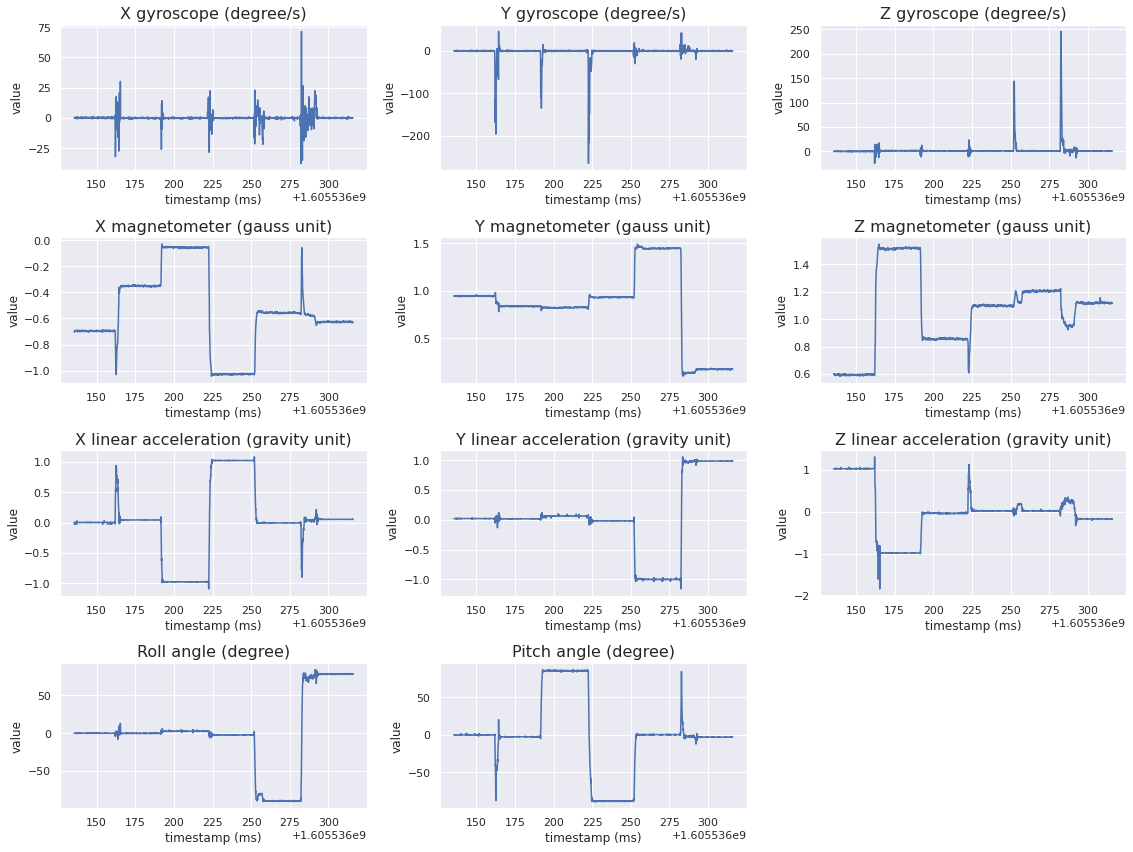

In [6]:
# Save plot for each measurment series

fig, axs = plt.subplots(4, 3, figsize=(16, 12))
for ax_x in range(4):
    for ax_y in range(3):
        axs[ax_x, ax_y].set_xlabel("timestamp (ms)")
        axs[ax_x, ax_y].set_ylabel("value")

_cols = ["gyr_x","gyr_y","gyr_z"]
_labels = ["X gyroscope (degree/s)",
           "Y gyroscope (degree/s)",
           "Z gyroscope (degree/s)"]
for i in range(3):
    axs[0, i].plot(df[col_names[0]], df[_cols[i]])
    axs[0, i].set_title(_labels[i], size=16)

_cols = ["mag_x","mag_y","mag_z"]
_labels = ["X magnetometer (gauss unit)",
           "Y magnetometer (gauss unit)",
           "Z magnetometer (gauss unit)"]
for i in range(3):
    axs[1, i].plot(df[col_names[0]], df[_cols[i]])
    axs[1, i].set_title(_labels[i], size=16)

_cols = ["la_x","la_y","la_z"]
_labels = ["X linear acceleration (gravity unit)",
           "Y linear acceleration (gravity unit)",
           "Z linear acceleration (gravity unit)"]
for i in range(3):
    axs[2, i].plot(df[col_names[0]], df[_cols[i]])
    axs[2, i].set_title(_labels[i], size=16)

_cols = ["roll","pitch"]
_labels = ["Roll angle (degree)",
           "Pitch angle (degree)"]
for i in range(2):
    axs[3, i].plot(df[col_names[0]], df[_cols[i]])
    axs[3, i].set_title(_labels[i], size=16)
    
axs[3,2].set_axis_off()
plt.tight_layout()
fig.savefig(FIGURES_FOLDER + "task_2_plotting.pdf")

# fig, axs = plt.subplots(6, 2, figsize=(14, 2*(len(col_names)-1)))
# for i in range(1,len(col_names)):
#     ax_x = i-1 if i<7 else i-7
#     ax_y = i//7
#     axs[ax_x, ax_y].plot(df[col_names[0]], df[col_names[i]])
#     axs[ax_x, ax_y].set_title(labels[i-1], size=16)
#     axs[ax_x, ax_y].set_xlabel("timestamp (ms)")
#     axs[ax_x, ax_y].set_ylabel("value")
# axs[5,1].set_axis_off()
# plt.tight_layout()
# fig.savefig(FIGURES_FOLDER + "task_2_plotting.pdf")

In [4]:
timestamps = df[col_names[0]].values
start_positions = [50, 500, 940, 1440, 1960, 2520]
interval_length = 350

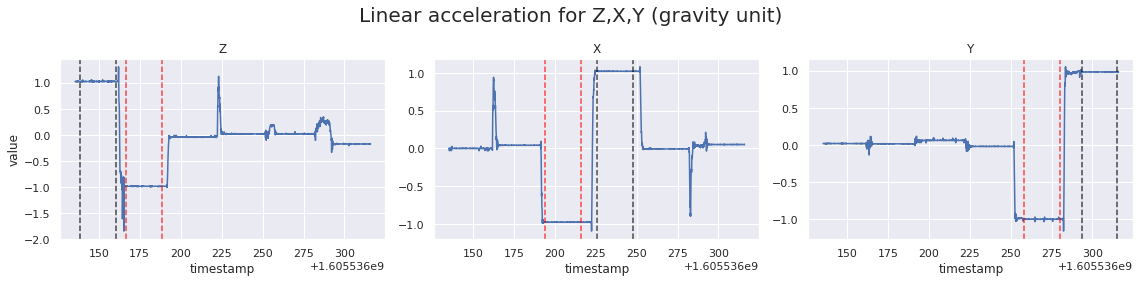

In [7]:
# +z axis, -z axis, +x axis, -x axis, +y axis, -y axis

fig, axs = plt.subplots(1, 3, figsize=(16, 4))
fig.suptitle("Linear acceleration for Z,X,Y (gravity unit)", fontsize=20)
_cols = ["la_z","la_x","la_y"]
_labels = ["Z", "X", "Y"]
for i in range(3):
    axs[i].set_title(_labels[i])
    axs[i].plot(df[col_names[0]], df[_cols[i]])
    axs[i].set_xlabel("timestamp")
    
    i_ = i*2
    sp_u = start_positions[i_]
    sp_d = start_positions[i_+1]
    
    if i==0:
        color_up = "black"
        color_down = "red"
    else:
        color_up = "red"
        color_down = "black"
    
    axs[i].axvline(timestamps[sp_u], alpha=0.7, ls="--", c=color_up)
    axs[i].axvline(timestamps[sp_u + interval_length], alpha=0.7, ls="--", c=color_up)
    axs[i].axvline(timestamps[sp_d], alpha=0.7, ls="--", c=color_down)
    axs[i].axvline(timestamps[sp_d + interval_length], alpha=0.7, ls="--", c=color_down)
    
axs[0].set_ylabel("value")
fig.tight_layout(rect=[0, 0, 1, 0.9])
fig.savefig(FIGURES_FOLDER + "acceler_au_ad_regions.pdf")
plt.show()

In [5]:
_cols = ["la_z","la_x","la_y"]

g = 9.80665

auad_table = np.zeros((3,8))

for i in range(3):
    i_ = i*2
    sp_u = start_positions[i_]
    sp_d = start_positions[i_+1]
    
    col_name = _cols[i]
    col_index = col_names.index(col_name)
    
    vals_u = df.iloc[sp_u:sp_u+interval_length, col_index]
    vals_d = df.iloc[sp_d:sp_d+interval_length, col_index]
    
    if i==0:
        a_u = vals_u.mean()
        a_d = vals_d.mean()
        auad_table[i, 0] = a_u
        auad_table[i, 1] = a_d
        
        auad_table[i, 2] = sp_u
        auad_table[i, 3] = sp_u+interval_length
        auad_table[i, 4] = sp_d
        auad_table[i, 5] = sp_d+interval_length
        
        auad_table[i, 6] = (a_u + a_d) / 2
        auad_table[i, 7] = (a_u - a_d) / (2 * g)
        
    else:
        a_u = vals_d.mean()
        a_d = vals_u.mean()
        auad_table[i, 0] = vals_d.mean()
        auad_table[i, 1] = vals_u.mean()
        
        auad_table[i, 2] = sp_d
        auad_table[i, 3] = sp_d+interval_length
        auad_table[i, 4] = sp_u
        auad_table[i, 5] = sp_u+interval_length
        
        auad_table[i, 6] = (a_u + a_d) / 2
        auad_table[i, 7] = (a_u - a_d) / (2 * g)

df_auad_columns_names = [
    "$a_u$", "$a_d$",
    "$t_{s, u}$ index", "$t_{e, u}$ index", "$t_{s, d}$ index", "$t_{e, d}$ index",
    "b", "k"
]
df_auad = pd.DataFrame(auad_table,
                       columns=df_auad_columns_names,
                       index=["Z", "X", "Y"])
for c in df_auad_columns_names[2:6]:
    df_auad[c] = df_auad[c].astype(int)

In [6]:
df_auad

,$a_u$,$a_d$,"$t_{s, u}$ index","$t_{e, u}$ index","$t_{s, d}$ index","$t_{e, d}$ index",b,k
Z,1.026369,-0.986151,50,400,500,850,0.020109,0.102610
X,1.022800,-0.976544,1440,1790,940,1290,0.023128,0.101938
Y,0.984131,-0.999481,2520,2870,1960,2310,-0.007675,0.101136


In [8]:
b_arr = df_auad["b"].values
G_arr = np.diag(df_auad["k"].values)

G_inv_arr = np.linalg.inv(G_arr)

In [9]:
la_zxy_arr = df[["la_z","la_x","la_y"]].iloc[start_positions[0]:start_positions[0]+interval_length].values

In [19]:
b_arr.shape, G_inv_arr.shape, la_zxy_arr.shape

((3,), (3, 3), (350, 3))

In [20]:
n_obs = la_zxy_arr.shape[0]

In [26]:
x_hat = G_inv_arr @ (la_zxy_arr - np.tile(b_arr, (n_obs,1))).T

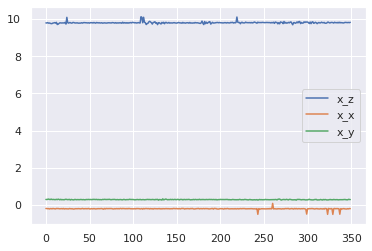

In [32]:
pd.DataFrame(x_hat.T, columns=["x_z", "x_x", "x_y"]).plot()